<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [89]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [90]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [91]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [92]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [93]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Task 2: Generate Descriptive Statistics and Visualizations

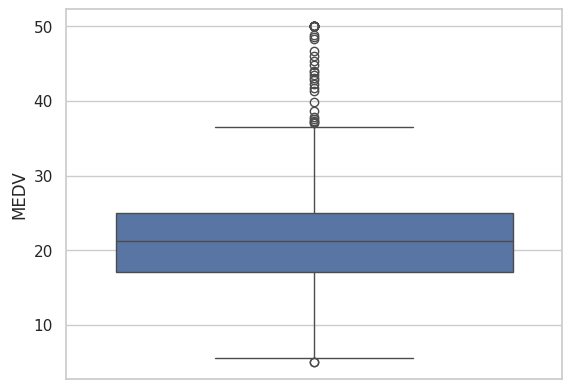

In [94]:
## For the "Median value of owner-occupied homes" provide a boxplot
sns.set(style="whitegrid")
ax1=sns.boxplot(y='MEDV',data=boston_df)

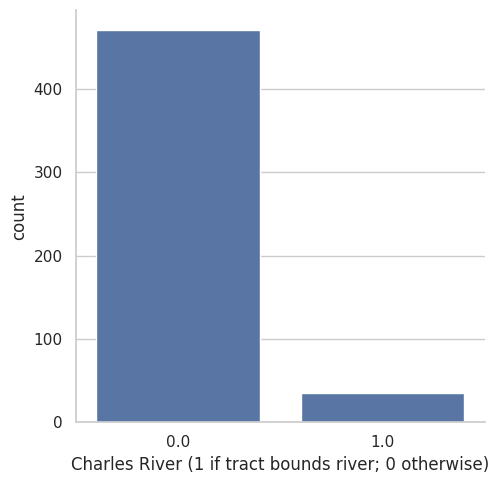

In [58]:
## Provide a  bar plot for the Charles river variable
ax2=sns.catplot(x='CHAS',kind='count',data=boston_df)
pyplot.xlabel("Charles River (1 if tract bounds river; 0 otherwise)")
pyplot.show()

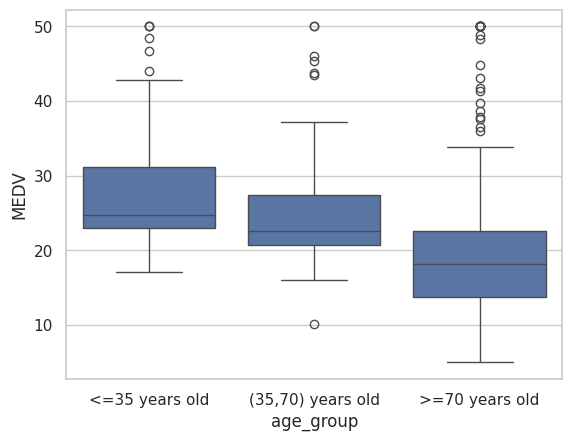

In [95]:
## Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '<=35 years old'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'age_group'] = '(35,70) years old'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '>=70 years old'
boston_df=boston_df.sort_values('AGE').reset_index()

ax3=sns.boxplot(x='age_group',y='MEDV',data=boston_df)



There appears to be a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.


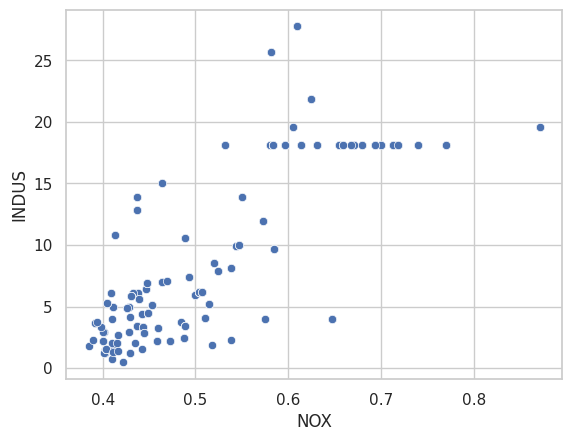

In [59]:
## Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
ax4=sns.scatterplot(x='NOX',y='INDUS',data=boston_df)

print('There appears to be a positive correlation between Nitric oxide concentrations and the proportion of non-retail business acres per town.')


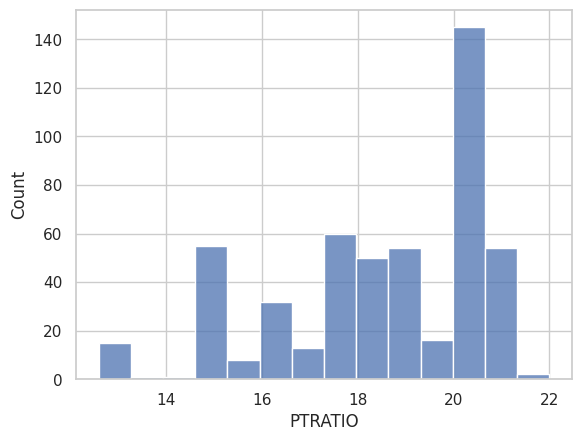

In [96]:
## Create a histogram for the pupil to teacher ratio variable
ax5=sns.histplot(boston_df['PTRATIO'],kde=False)

#### Task 3: Use the appropriate tests to answer the questions provided


LeveneResult(statistic=8.751904896045996, pvalue=0.003238119367639829)
TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)
Since the p-value is less than alpha value 0.05, we reject the null hypothesis that there is no difference in median value of houses bounded by the Charles river. 


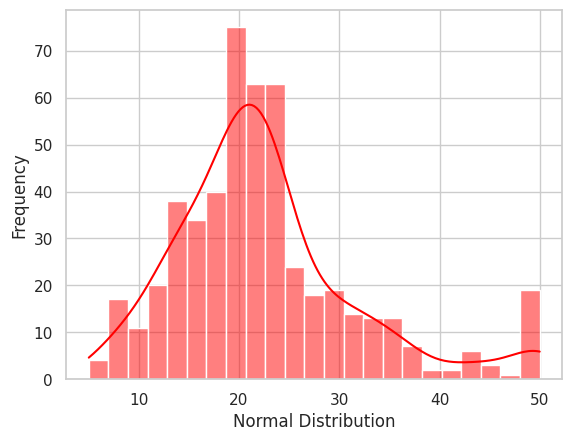

In [97]:
# Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

# Hypothesis

# *   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses bounded by the Charles river.")
# *   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses bounded by the Charles river.")

# Check for normality of the variable 'median value of houses'
ax6 = sns.histplot(boston_df['MEDV'],
                  kde=True,
                  color='red')
ax6.set(xlabel='Normal Distribution', ylabel='Frequency')

# Check for homogeneity of variance
levene=scipy.stats.levene(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], center='mean')
print(levene)

# Run T-test
ttest=scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False)

print(ttest)
print("Since the p-value is less than alpha value 0.05, we reject the null hypothesis that there is no difference in median value of houses bounded by the Charles river. ")

In [98]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

## I'll use the same 3 age groups as above
#Hypothesis

#*   $H\_0: µ\_1 = µ\_2 = µ\_3$ (the three population means are equal)
#*   $H\_1:$ At least one of the means differ

levene_age=scipy.stats.levene(boston_df[boston_df['age_group'] == '<=35 years old']['MEDV'],
                   boston_df[boston_df['age_group'] == '(35,70) years old']['MEDV'], 
                   boston_df[boston_df['age_group'] == '>=70 years old']['MEDV'], 
                   center='mean')

print(levene_age)

# Run one-way ANOVA
thirtyfive_lower = boston_df[boston_df['age_group'] == '<=35 years old']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == '(35,70) years old']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '>=70 years old']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

print("Since the p-value is less than 0.05, we can reject the null hypothesis as there is significant evidence that at least one of the means differ.")


LeveneResult(statistic=2.780620029374833, pvalue=0.06295337343259205)
F_Statistic: 36.40764999196598, P-Value: 1.7105011022702984e-15
Since the p-value is less than 0.05, we can reject the null hypothesis as there is significant evidence that at least one of the means differ.


In [99]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
# Hypothesis:

#*   $H\_0:$ Nitric oxide concentration levels are not correlated with the proportion of non-retail business acres per town
#*   $H\_1:$ Nitric oxide concentration levels are correlated with the proportion of non-retail business acres per town

corr=scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(corr)
print("Since the p-value  (Sig. (2-tailed)  < 0.05, we reject the null hypothesis and conclude that there  exists a relationship between NOX and INDUS.")


PearsonRResult(statistic=0.7636514469209164, pvalue=7.913361061231321e-98)
Since the p-value  (Sig. (2-tailed)  < 0.05, we reject the null hypothesis and conclude that there  exists a relationship between NOX and INDUS.


In [100]:
# What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

y=boston_df['MEDV']
x=boston_df['DIS']

x=sm.add_constant(x)

model = sm.OLS(y,x).fit(cov_type='HC1')

print(model.summary())

print("Conclusion: for each unit of weighted distance to five Boston employment centres, the median value of owner-occupied homes increases by $1091.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     35.65
Date:                Sat, 31 Aug 2024   Prob (F-statistic):           4.46e-09
Time:                        14:55:02   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.894     20.560      0.0